# Lección 1: EDA

### Ejercicios de pair programming 27 de enero.

In [2]:
# Importamos las librerías necesarias

# Tratamiento de datos
import numpy as np
import pandas as pd
import sidetable as stb

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns


#  Gestión de warnings
import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
# llamamos a nuestro dataset
df = pd.read_csv("datos/Invistico_Airline.csv", index_col = 0)
df.reset_index(inplace=True)

#### Información acerca de nuestro dataset:

**Satisfaction:** Satisfacción del cliente.

**Gender:** Género del cliente.

**Customer type:** Fiel o infiel.

**Age:** Edad.

**Type of travel:** Personal o por trabajo.

**Class:** Clase del asiento.

**Flight distance:** Tiempo de trayecto.

**Seat confort:** Nivel de comodidad del asiento.

**Departure/Arrival time convenient:** Satisfacción del cliente respecto al tiempo de despegue/aterrizaje.

**Food and drink:** Satisfacción del cliente respecto la comida y la bebida del vuelo.

**Gate location:** Satisfacción del cliente respecto a la localización de la puerta de embarque.

**Inflight wifi services:** Satisfacción del cliente respecto al wifi del avión. 

**Inflight entertainment:** Satisfacción del cliente respecto al entretenimiento en el vuelo.

**Online support:** Satisfacción del cliente respecto al soporte online recibido.

**Ease of Online booking:** Satisfacción del cliente respecto a la facilidad de reservar el vuelo online.

**On-board service:** Satisfacción del cliente respecto al personal del vuelo.

**Leg room service:** Satisfacción del cliente respecto al espacio para las piernas.

**Baggage handling:** Satisfacción del cliente respecto la gestión del equipaje de mano.

**Checkin service:** Satisfacción del cliente respecto al servicio durante el checkin.

**Cleanliness:** Satisfacción del cliente respecto a la limpieza del avión.

**Online boarding:** Satisfacción del cliente respecto al embarque online.

**Departure Delay in Minutes:** Los minutos de retraso que han tardado en despegar.

**Arrival Delay in Minutes:** Los minutos de retraso que han tardado en aterrizar.

En todas las columnas de satisfacción, 0 implica:
- Que no han contestado.
- Que no han usado el servicio.

Del 1 al 5, es el nivel de satisfacción, siendo 1 el más bajo y 5 el más alto.

In [4]:
#sacamos el tamaño de nuestro df
df.shape

(129880, 23)

In [5]:
#la informacion de nuestras columnas es:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [6]:
#el conteo de nulos en nuestro df
df.stb.missing()

,missing,total,percent
Arrival Delay in Minutes,393,129880,0.302587
Inflight entertainment,0,129880,0.000000
Departure Delay in Minutes,0,129880,0.000000
Online boarding,0,129880,0.000000
Cleanliness,0,129880,0.000000
Checkin service,0,129880,0.000000
Baggage handling,0,129880,0.000000
Leg room service,0,129880,0.000000
On-board service,0,129880,0.000000
Ease of Online booking,0,129880,0.000000


In [7]:
# la cantidad de nulos es tan pequeña, que hemos decidido rellenarlos con la mediana
df["Arrival Delay in Minutes"].fillna(df["Arrival Delay in Minutes"].median(), inplace= True)

In [8]:
#comprobamos que no nos quedan nulos
df.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [9]:
#los principales estadisticos de nuestras columnas numericas son:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
Seat comfort,129880.0,2.838597,1.392983,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,2.990645,1.527224,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,2.851994,1.443729,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.990422,1.305970,0.0,2.0,3.0,4.0,5.0
Inflight wifi service,129880.0,3.249130,1.318818,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,129880.0,3.383477,1.346059,0.0,2.0,4.0,4.0,5.0
Online support,129880.0,3.519703,1.306511,0.0,3.0,4.0,5.0,5.0
Ease of Online booking,129880.0,3.472105,1.305560,0.0,2.0,4.0,5.0,5.0


In [10]:
# y los estadisticos de las columnas categoricas
df.describe(include="object").T

,count,unique,top,freq
satisfaction,129880,2,satisfied,71087
Gender,129880,2,Female,65899
Customer Type,129880,2,Loyal Customer,106100
Type of Travel,129880,2,Business travel,89693
Class,129880,3,Business,62160


In [11]:
df.duplicated().sum()  # comprobamos que no tenemos duplicados

0

In [12]:
df.dtypes  # comprobamos el tipo de datos que hay en nuestras columnas

satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

In [13]:
# cambiamos el tipo de la columna Arrival Delay in minutes, de float a int
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].astype(int)

In [14]:
df.dtypes  #comprobamos que el cambio se ha hecho correctamente

satisfaction                         object
Gender                               object
Customer Type                        object
Age                                   int64
Type of Travel                       object
Class                                object
Flight Distance                       int64
Seat comfort                          int64
Departure/Arrival time convenient     int64
Food and drink                        int64
Gate location                         int64
Inflight wifi service                 int64
Inflight entertainment                int64
Online support                        int64
Ease of Online booking                int64
On-board service                      int64
Leg room service                      int64
Baggage handling                      int64
Checkin service                       int64
Cleanliness                           int64
Online boarding                       int64
Departure Delay in Minutes            int64
Arrival Delay in Minutes        

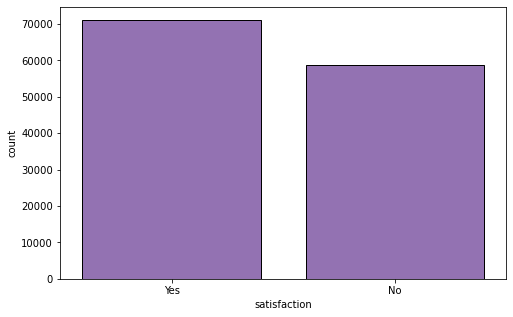

In [15]:
# creamos una gráfica para visualizar la cantidad de clientes satisfechos/insatisfechos
plt.figure(figsize=(8,5))

fig1 = sns.countplot(data = df, x = "satisfaction",  color = "C4",  edgecolor='black')
fig1.set(xticklabels=["Yes", "No"]) 
plt.show();

In [16]:
# lo vemos también en porcentajes
df["satisfaction"].value_counts() / df.shape[0]

satisfied       0.547328
dissatisfied    0.452672
Name: satisfaction, dtype: float64

Como vemos que el conteo de los registros es: 55% satisfechos y 45% de insatisfechos vemos que nuestra variable respuesta NO esta desbalanceada

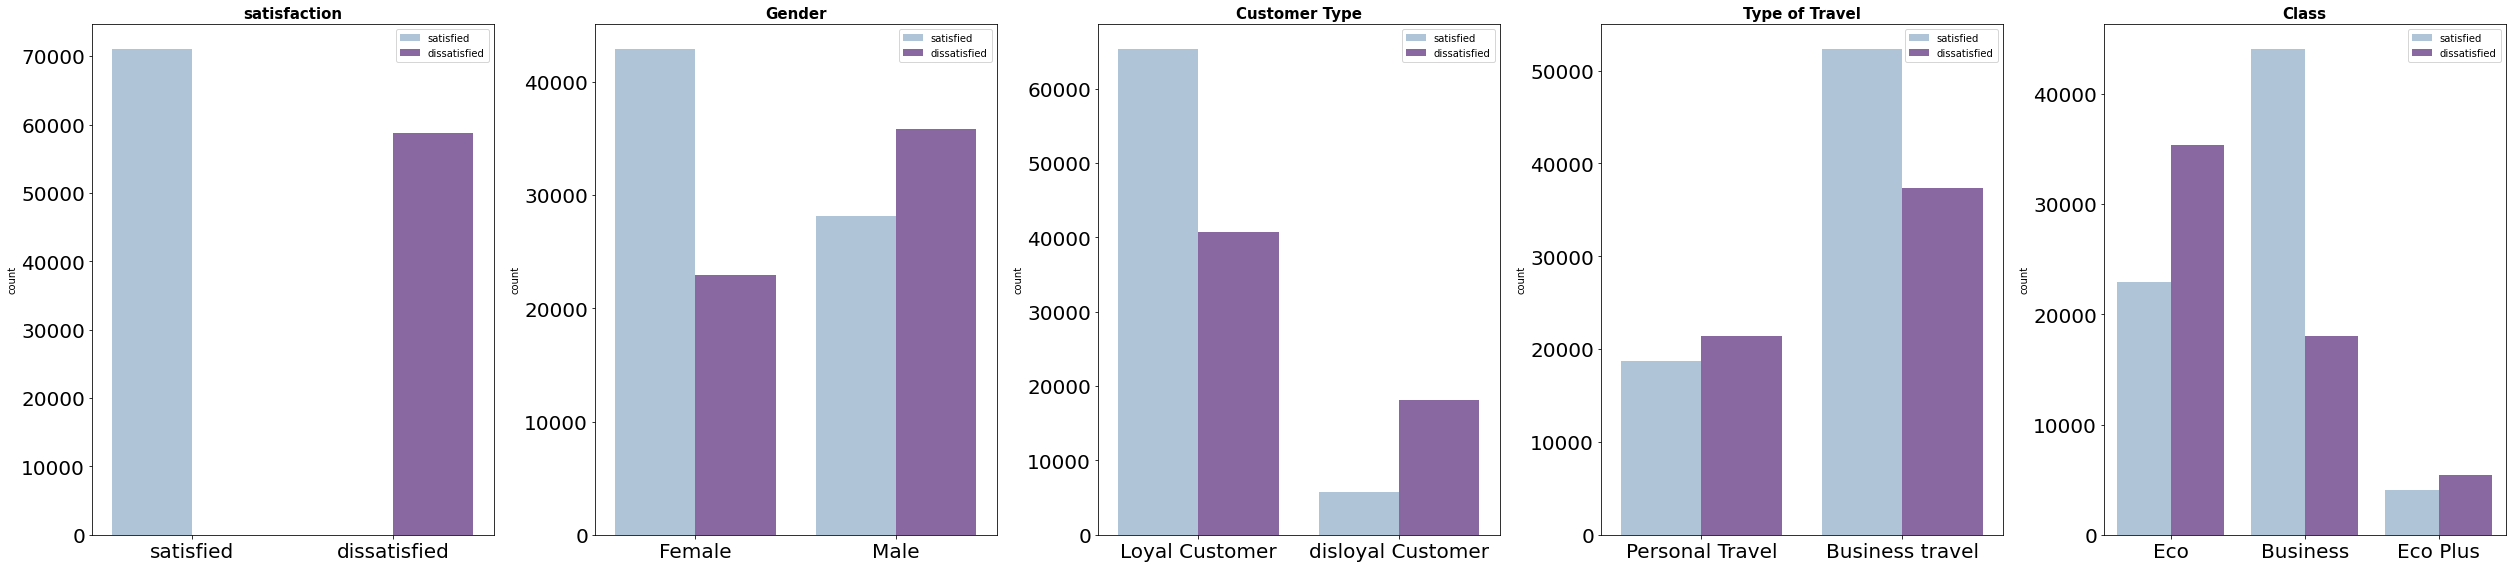

In [17]:
fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (35, 8))

axes = axes.flat
columnas_cat = df.select_dtypes(include = "O").columns

for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = df,
        x = colum,
        hue = "satisfaction",
        palette= 'BuPu',
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].legend(loc= "upper right")

fig.tight_layout();

En la gráfica anterior, vemos cómo la mayoría de las mujeres están satisfechas, pero la mayoría de los hombres no lo están.

Lo que también es interesante es que la mayoría de los clientes habituales están satisfechos, pero la mayoría (con mucha diferencia) de los clientes desleales, no están satisfechos.

Por último, algo que cabe destacar, es que en la clase de los vuelos, quién viajó con la clase más barata quedó muy insatisfehco y quién viajó con la clase más cara, quedó altamente satisfecho. No es de extrañar, pero la diferencia es suficientemente importante cómo para comentarlo y tenerlo en cuenta en nuestro análisis.



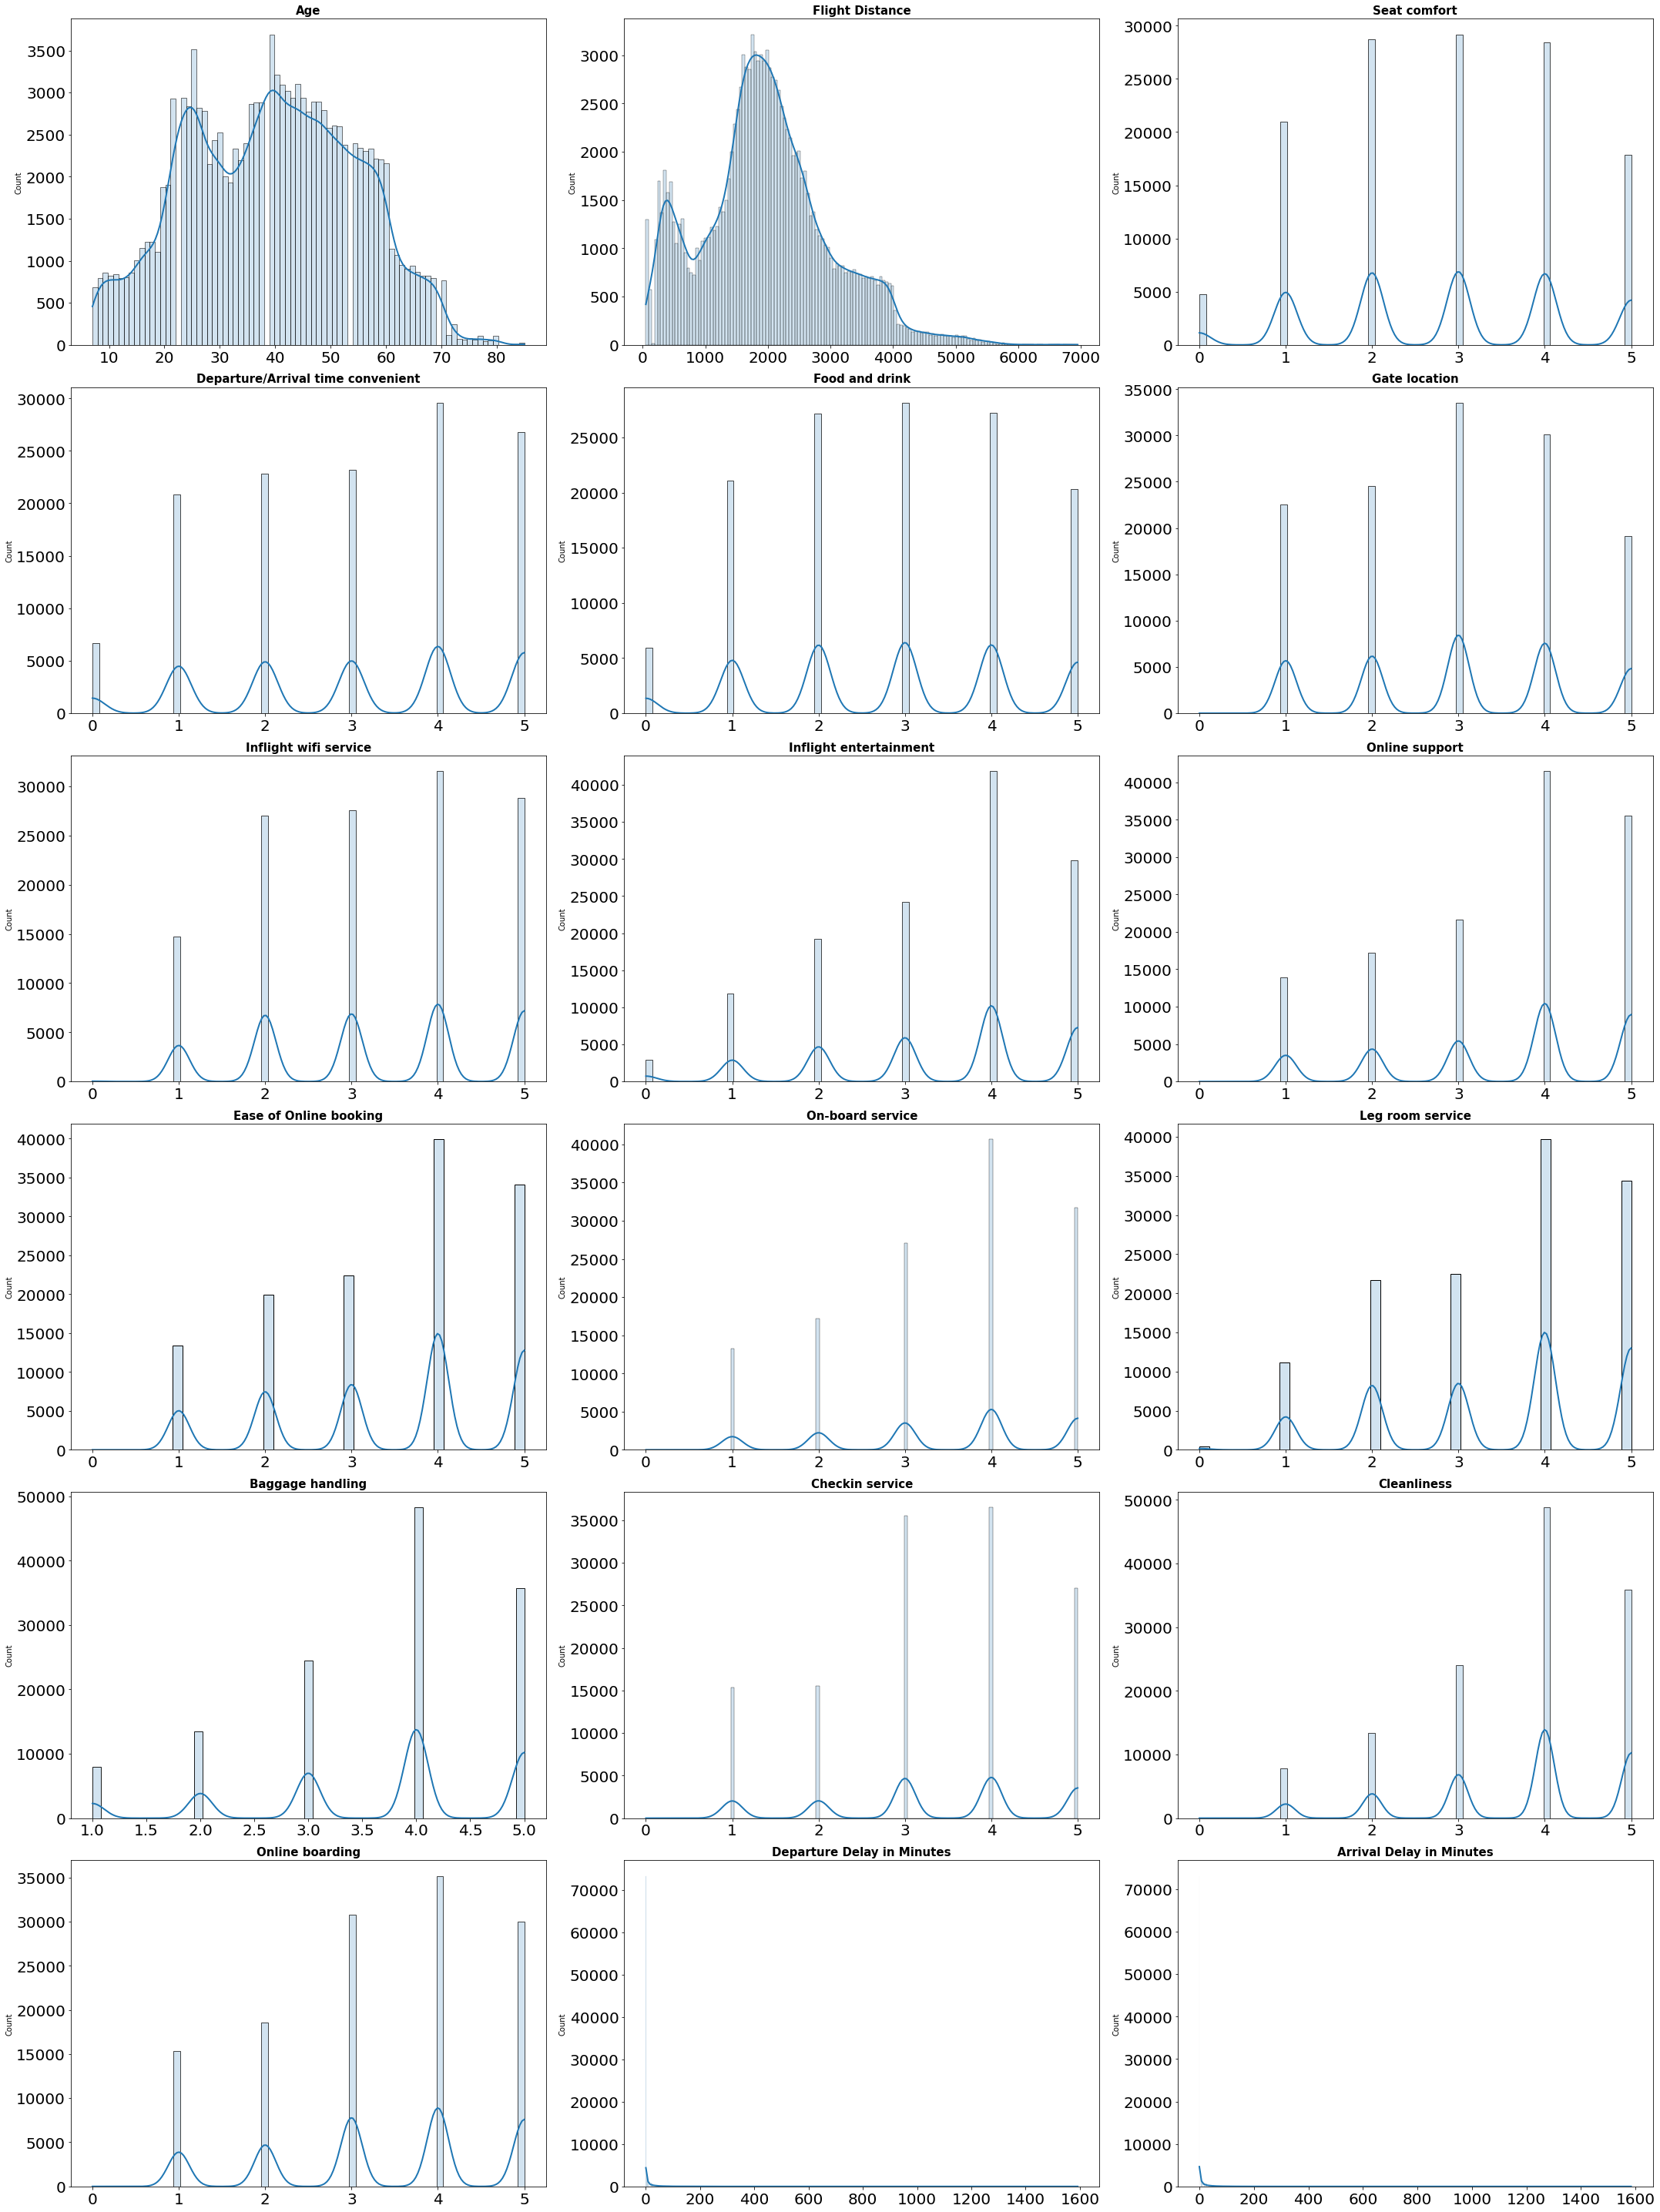

In [18]:
fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize = (30, 40))


axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        line_kws = {"linewidth": 2}, 
        palette= 'BuPu',
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.tight_layout();

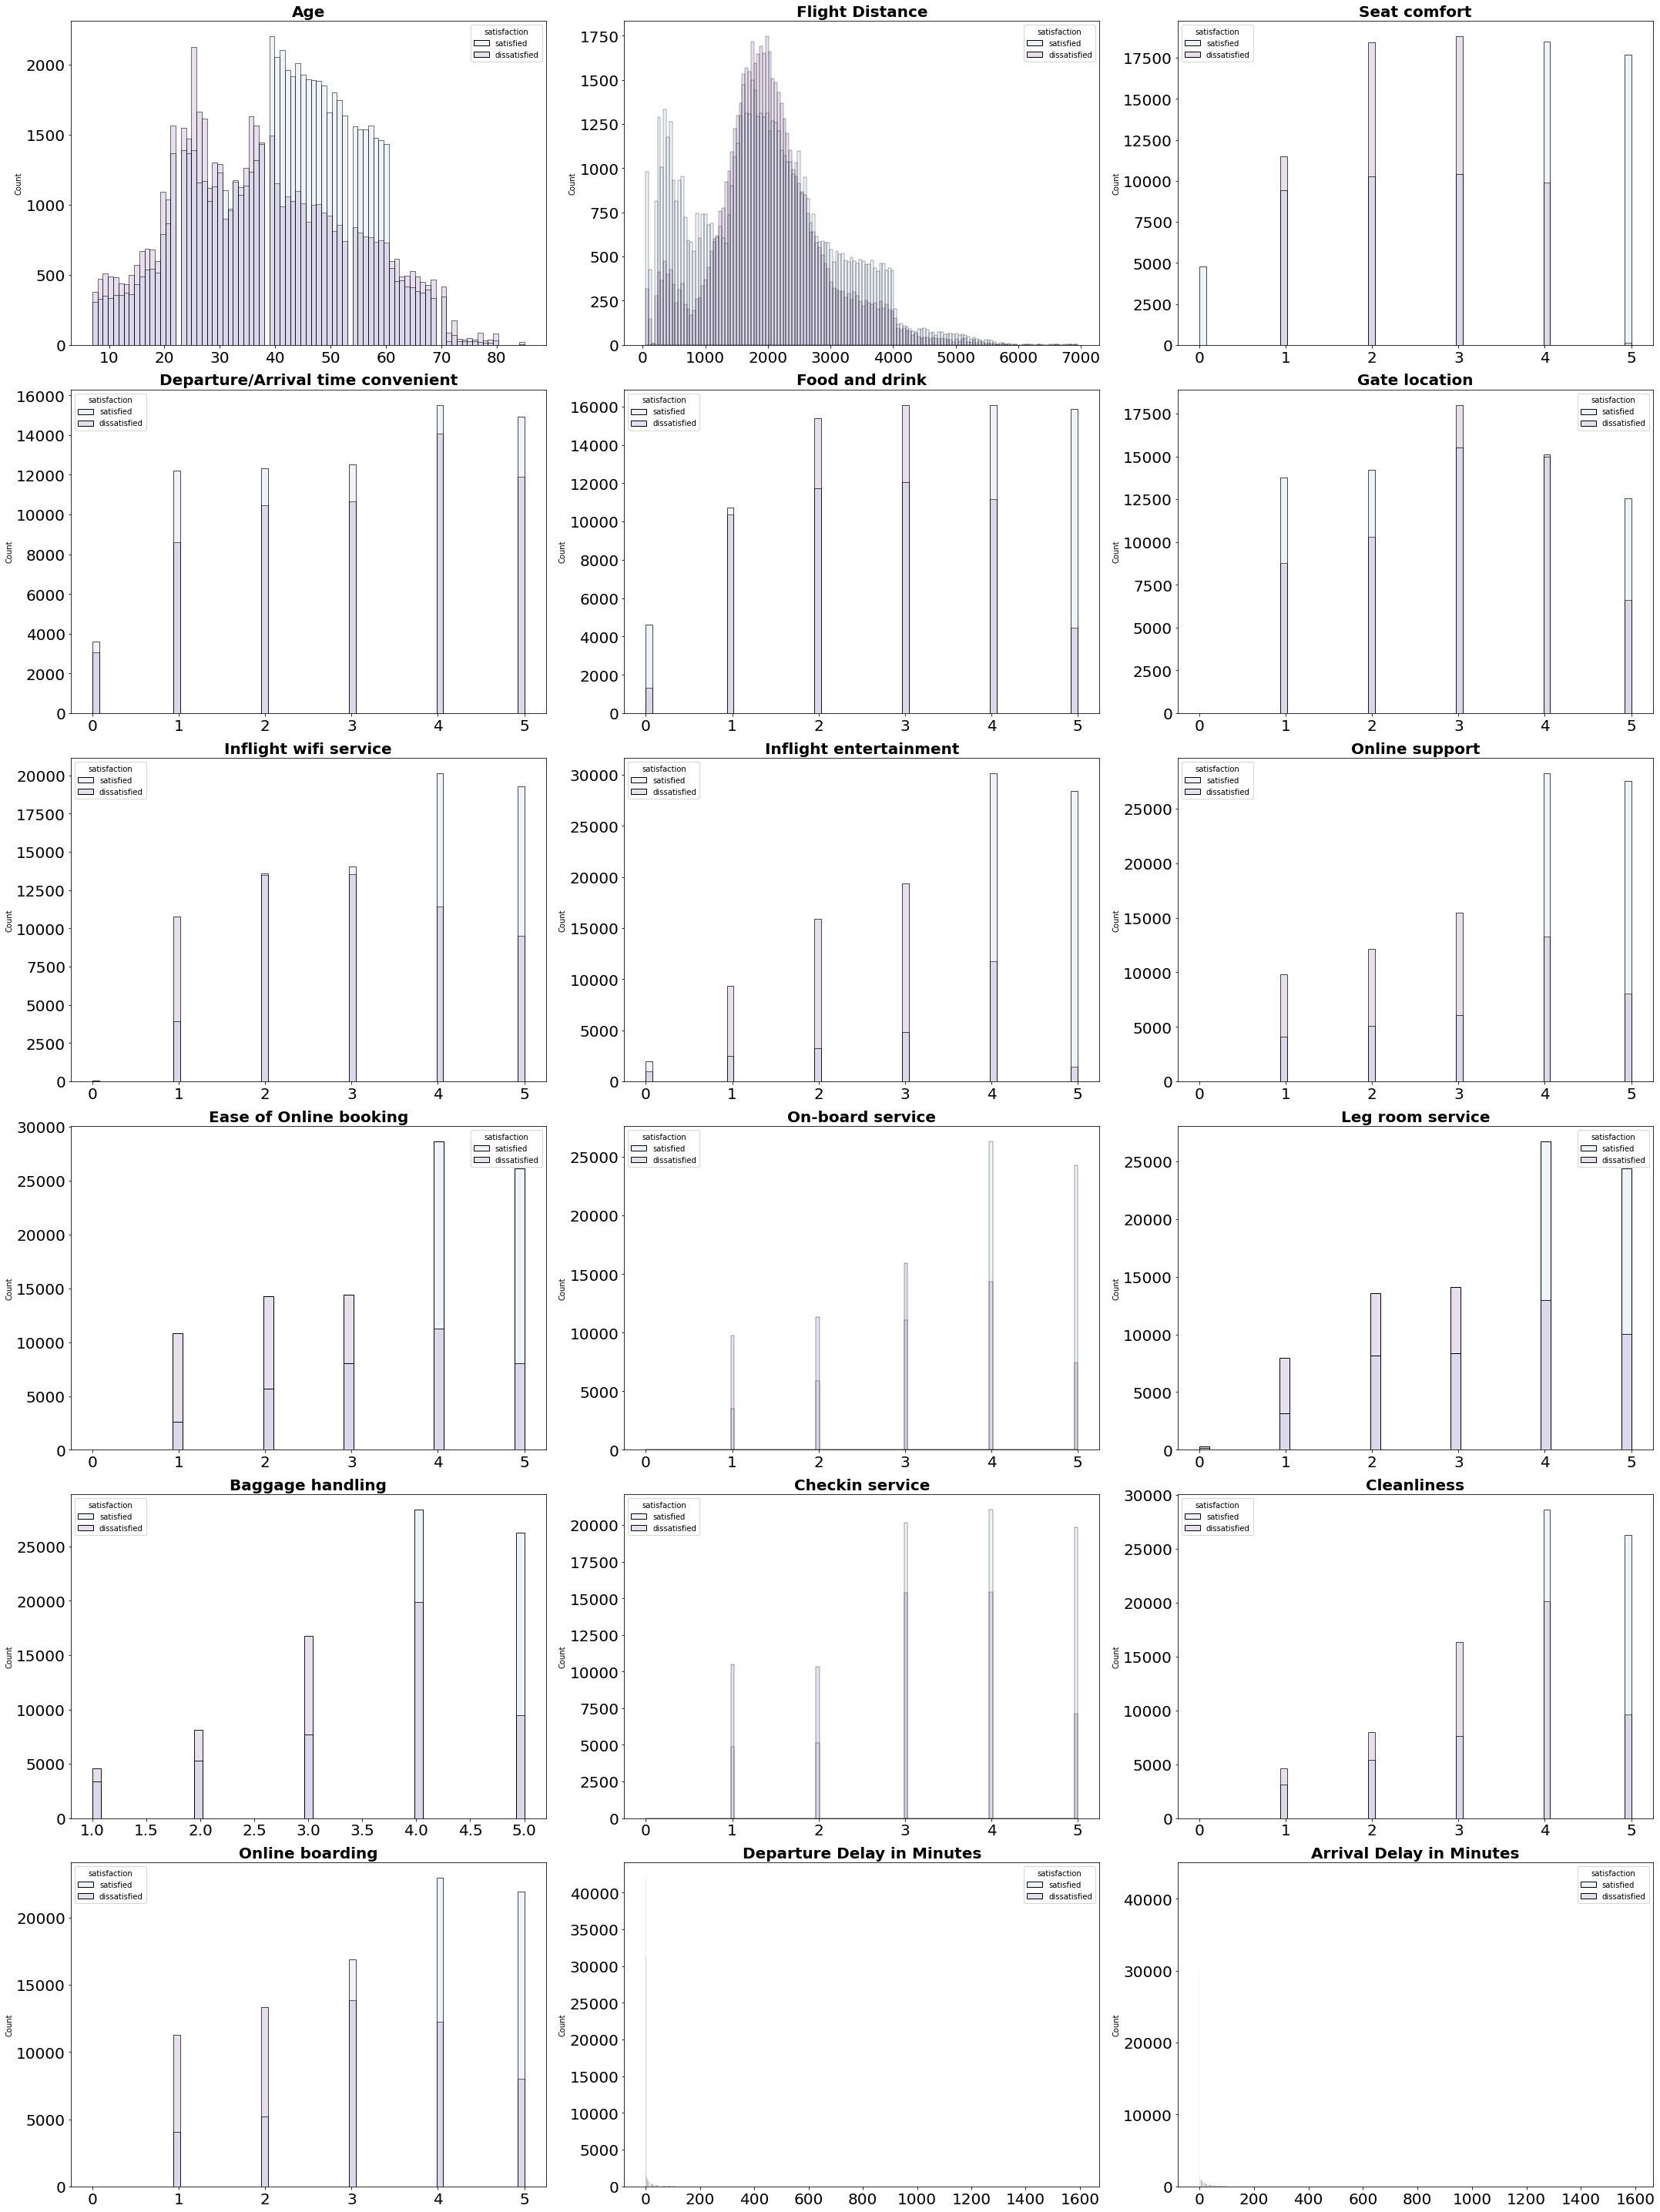

In [19]:
fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize = (30, 40))

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns


for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        hue = "satisfaction", 
        line_kws = {"linewidth": 2}, 
        palette= 'BuPu',
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 20, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.tight_layout();

In [20]:
df_num = df.select_dtypes(include = np.number)  #sacamos las columnas numericas para poder hacer la correlacion entre ellas
df_num.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0
1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305
2,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0
3,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0
4,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0


In [21]:
correlacion = df_num.corr()
correlacion

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,-0.249625,0.008784,0.039055,0.015749,-0.000547,0.013965,0.130511,0.121201,0.071594,0.066704,0.083762,-0.015452,0.031845,-0.018271,0.037973,-0.009041,-0.011206
Flight Distance,-0.249625,1.000000,-0.042409,0.001350,-0.004649,-0.002409,0.012230,-0.027542,-0.032022,-0.022299,-0.032559,-0.030316,0.019768,0.002456,0.009432,0.009604,0.112555,0.109733
Seat comfort,0.008784,-0.042409,1.000000,0.434951,0.715997,0.405300,0.129131,0.426447,0.120278,0.211531,0.121149,0.136136,0.118489,0.041214,0.108475,0.130396,-0.023817,-0.025463
Departure/Arrival time convenient,0.039055,0.001350,0.434951,1.000000,0.527381,0.544259,-0.001974,0.077203,-0.000546,0.001755,0.060446,0.029422,0.067396,0.062794,0.067126,-0.000623,0.004395,0.002500
Food and drink,0.015749,-0.004649,0.715997,0.527381,1.000000,0.523328,0.025917,0.367669,0.028554,0.041189,0.038646,0.074161,0.036370,0.011898,0.033416,0.013587,-0.013433,-0.014845
Gate location,-0.000547,-0.002409,0.405300,0.544259,0.523328,1.000000,-0.004086,-0.000280,0.002908,0.001442,-0.025132,-0.007407,-0.000401,-0.031859,-0.001705,-0.003043,0.003962,0.003620
Inflight wifi service,0.013965,0.012230,0.129131,-0.001974,0.025917,-0.004086,1.000000,0.253823,0.557340,0.601100,0.060794,0.033589,0.038251,0.092508,0.038263,0.631786,-0.032900,-0.035198
Inflight entertainment,0.130511,-0.027542,0.426447,0.077203,0.367669,-0.000280,0.253823,1.000000,0.441957,0.321731,0.183912,0.160731,0.117213,0.224120,0.109451,0.355714,-0.030491,-0.033182
Online support,0.121201,-0.032022,0.120278,-0.000546,0.028554,0.002908,0.557340,0.441957,1.000000,0.617489,0.157930,0.138433,0.102444,0.206824,0.095726,0.669843,-0.034018,-0.035940
Ease of Online booking,0.071594,-0.022299,0.211531,0.001755,0.041189,0.001442,0.601100,0.321731,0.617489,1.000000,0.436264,0.355122,0.398322,0.137744,0.417675,0.684320,-0.036545,-0.039717


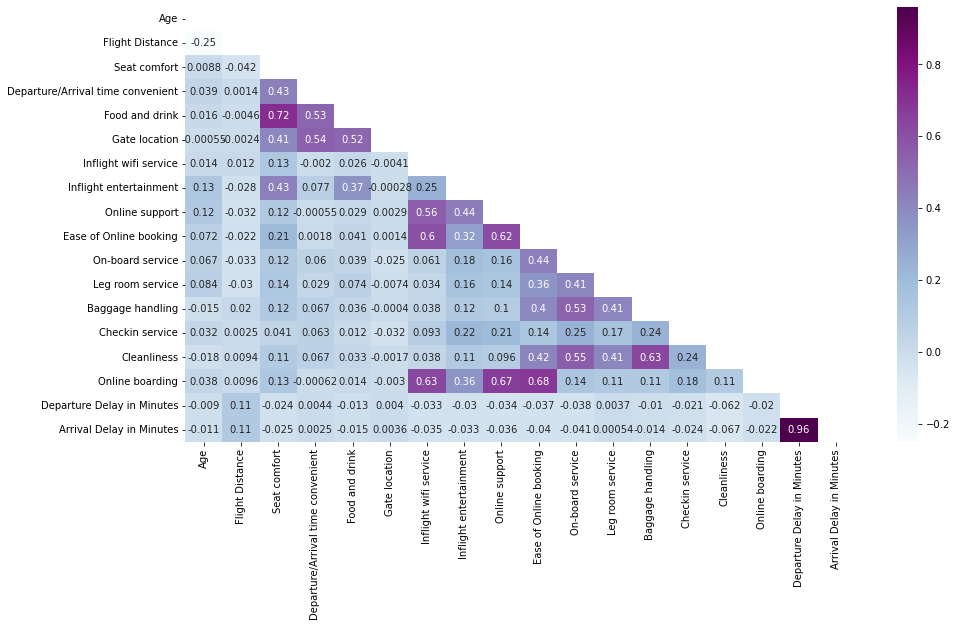

In [22]:
#sacamos un heatmap para ver las correlaciones visualmente

plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(correlacion, dtype=bool))
sns.heatmap(correlacion, cmap="BuPu", annot = True, mask = mask);


Encontramos correlaciones positivas muy altas entre la comida y la comodidad del asiento, y entre el retraso de despegue de los vuelos y la distancia que recorren.

Tambien tendrian correlacion, aunque no tan alta, Online boarding con Online support  y online boarding con easy of online booking(tendria sentido si tienen un buen o mal servicio online se veran relacionadas ya que pertenecen al mismo servicio online de atencion al cliente)

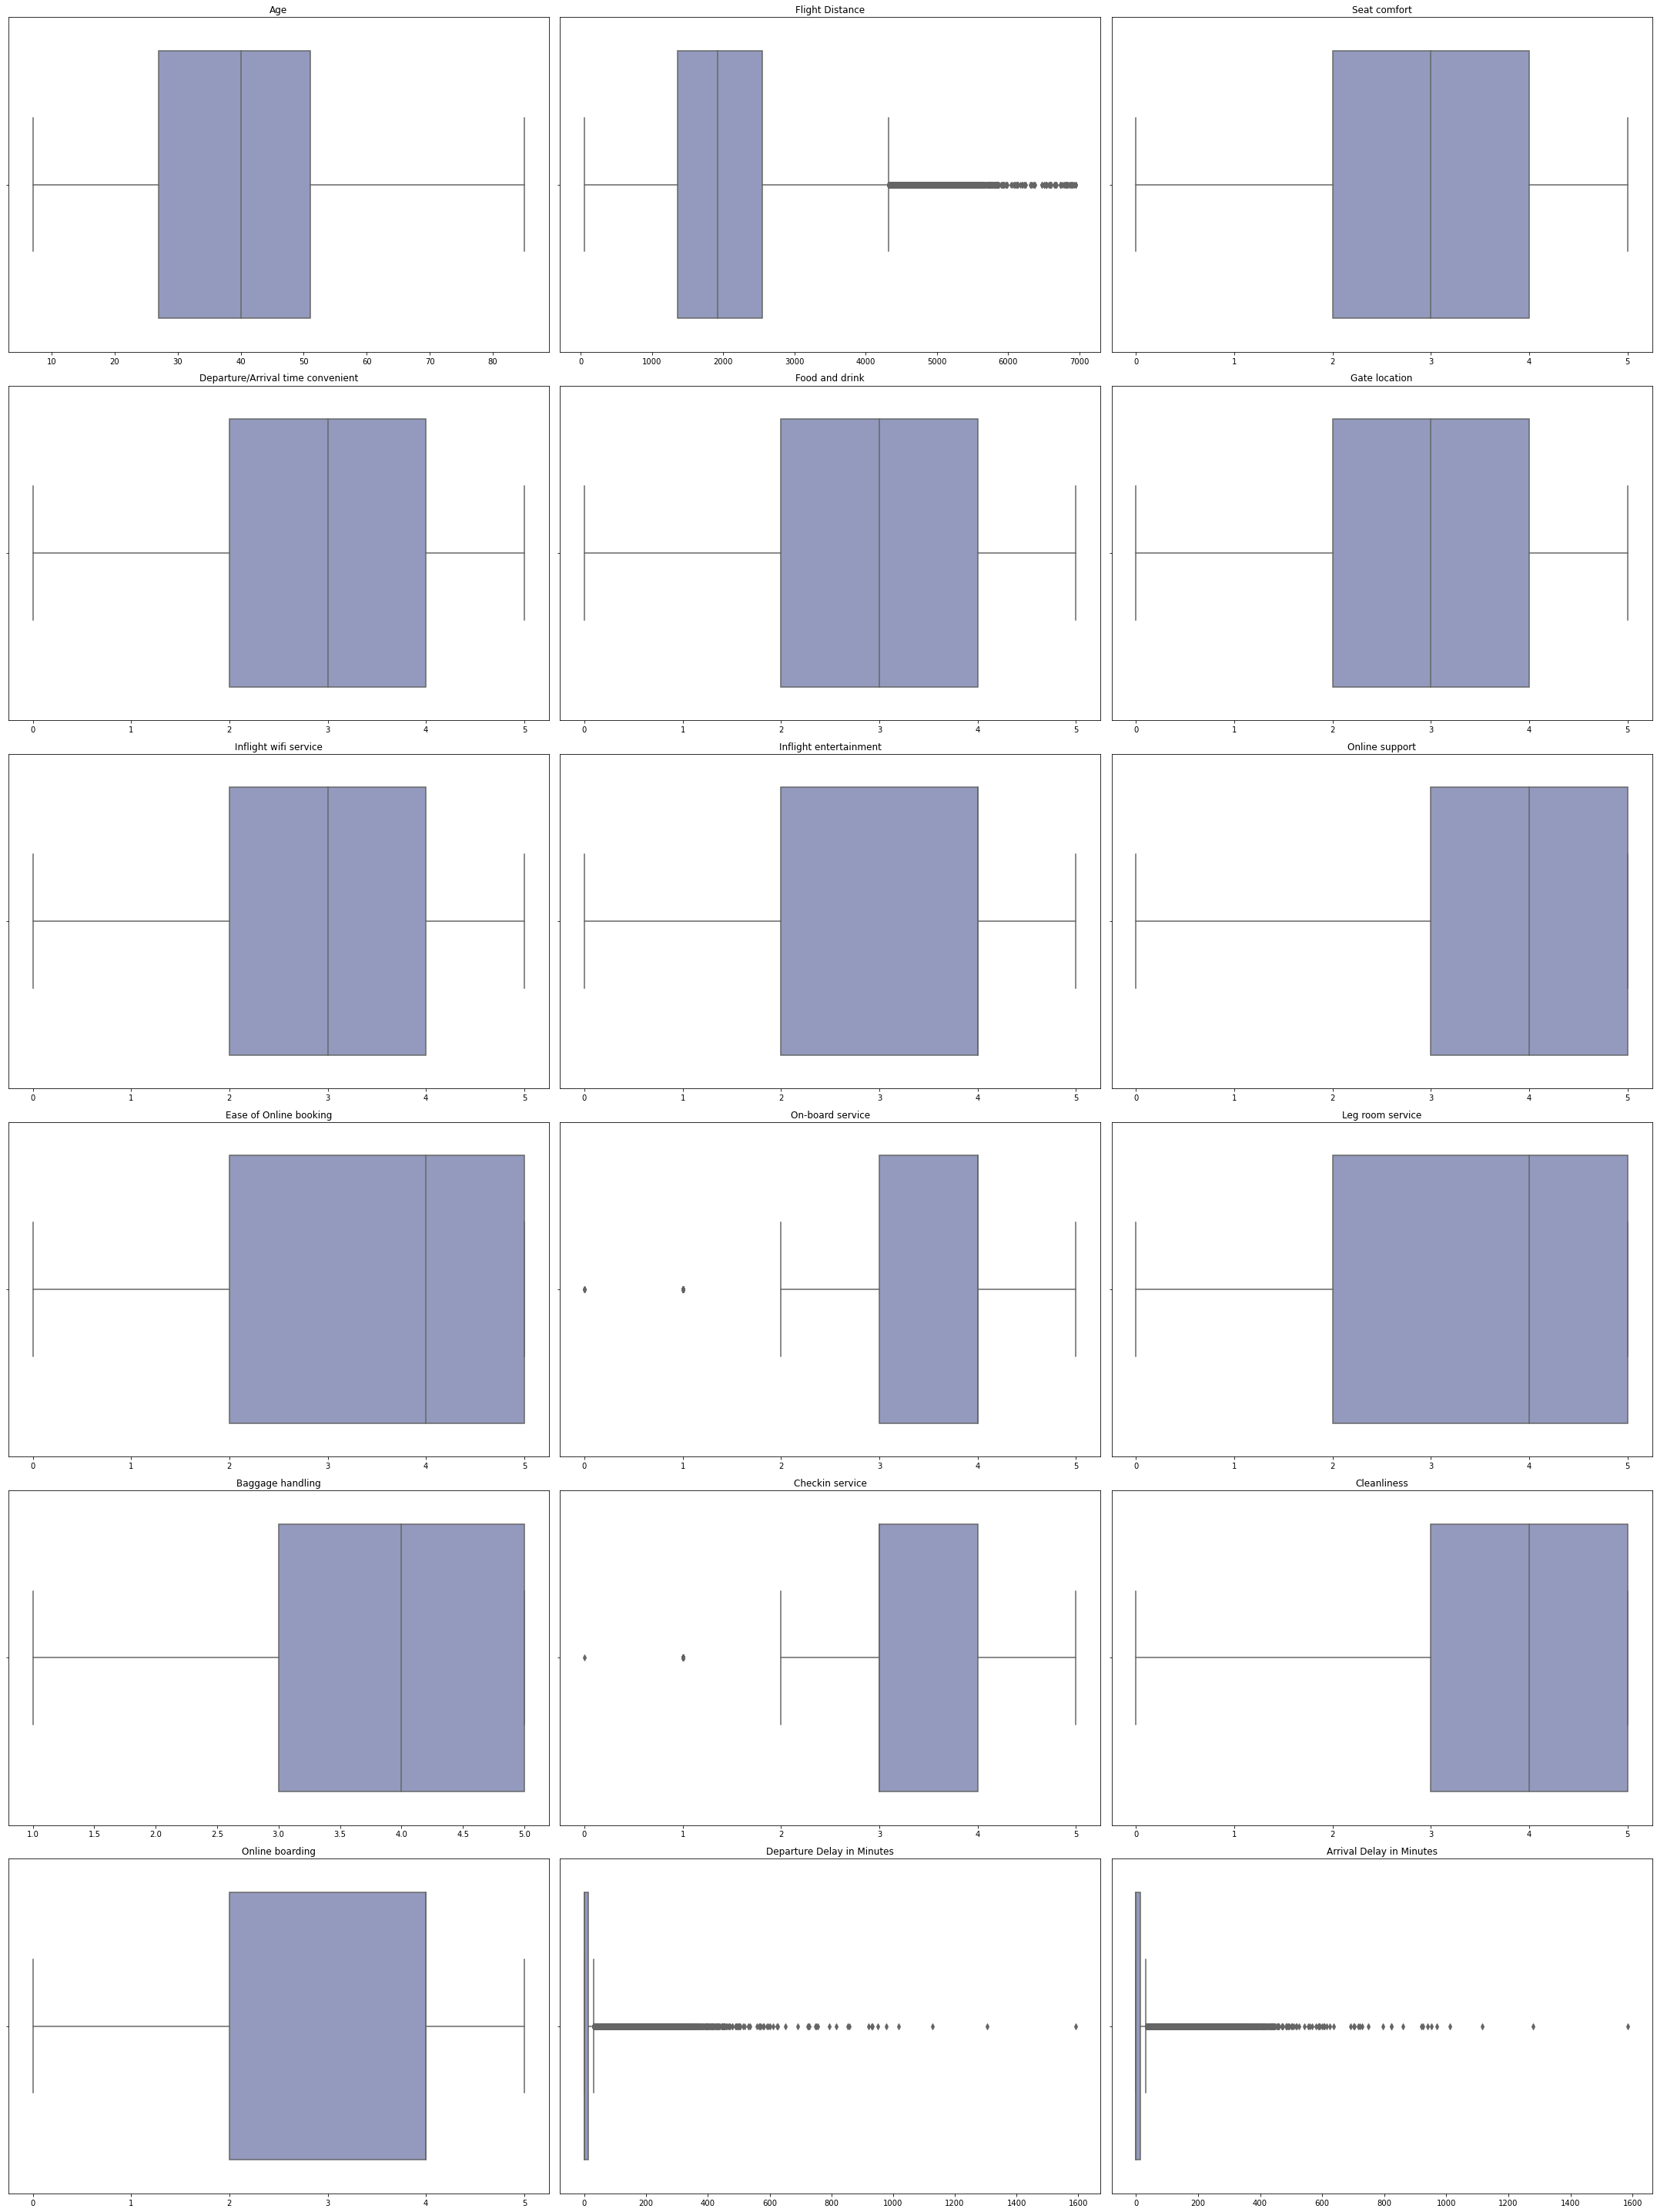

In [23]:
#sacamos los outliers visualmente

fig, axes = plt.subplots(6, 3, figsize=(30,40))

axes = axes.flat

for indice, cate in enumerate(df_num):

    sns.boxplot(x = df[cate], data = df, ax=axes[indice], palette = "BuPu"); # para trazar una línea de densidad

    axes[indice].set_title(cate)
    axes[indice].set_xlabel("")

fig.tight_layout();

En nuestro caso, no vemos ningún beneficio en eliminar los outliers.

**Flight distance:** Hay una diferencia entre vuelos cortos y largos, no son outliers como tal.

**Onboard service y Checkin service:** Son notas de satisfacción, por lo tanto tampoco tendría sentido eliminarlas.

**Depart Arrival Delay in Minutes y Arrival Delay in Minutes:**
Son los minutos en qué el vuelo se ha retrasado, los valores únicos son la mayoría, por lo que todos los outliers son importantes.




Viendo que en la distancia de los vuelos hay muchos outliers, haremos una division del conjunto de datos entre vueltos cortos y vuelos largos. 
Cortos seran en los que la distancia del vuelo no superen las 4000 millas.

In [24]:
#hacemos un df con los vuelos que  no superan las 4000 millas de distancia
df_cortos = df[df["Flight Distance"] < 4000 ]

In [25]:
df_cortos.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0


In [26]:
#hacemos un df con los vuelos que superan las 4000 millas de distancia

df_largos = df[df["Flight Distance"] >= 4000]
df_largos.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
90,satisfied,Male,Loyal Customer,40,Personal Travel,Eco,4161,0,1,1,1,1,4,4,4,4,1,2,4,3,4,0,0
145,satisfied,Female,Loyal Customer,21,Personal Travel,Eco,4804,0,2,0,4,5,0,5,5,4,1,4,2,3,5,20,0
438,satisfied,Female,Loyal Customer,17,Personal Travel,Business,4242,0,4,0,4,0,2,2,5,3,4,5,2,4,2,0,7
441,satisfied,Female,Loyal Customer,8,Personal Travel,Business,4079,0,4,0,4,4,0,4,4,4,1,5,3,2,4,0,0
540,satisfied,Female,Loyal Customer,13,Personal Travel,Eco,6792,0,5,0,1,0,1,1,3,4,5,5,1,3,1,3,0


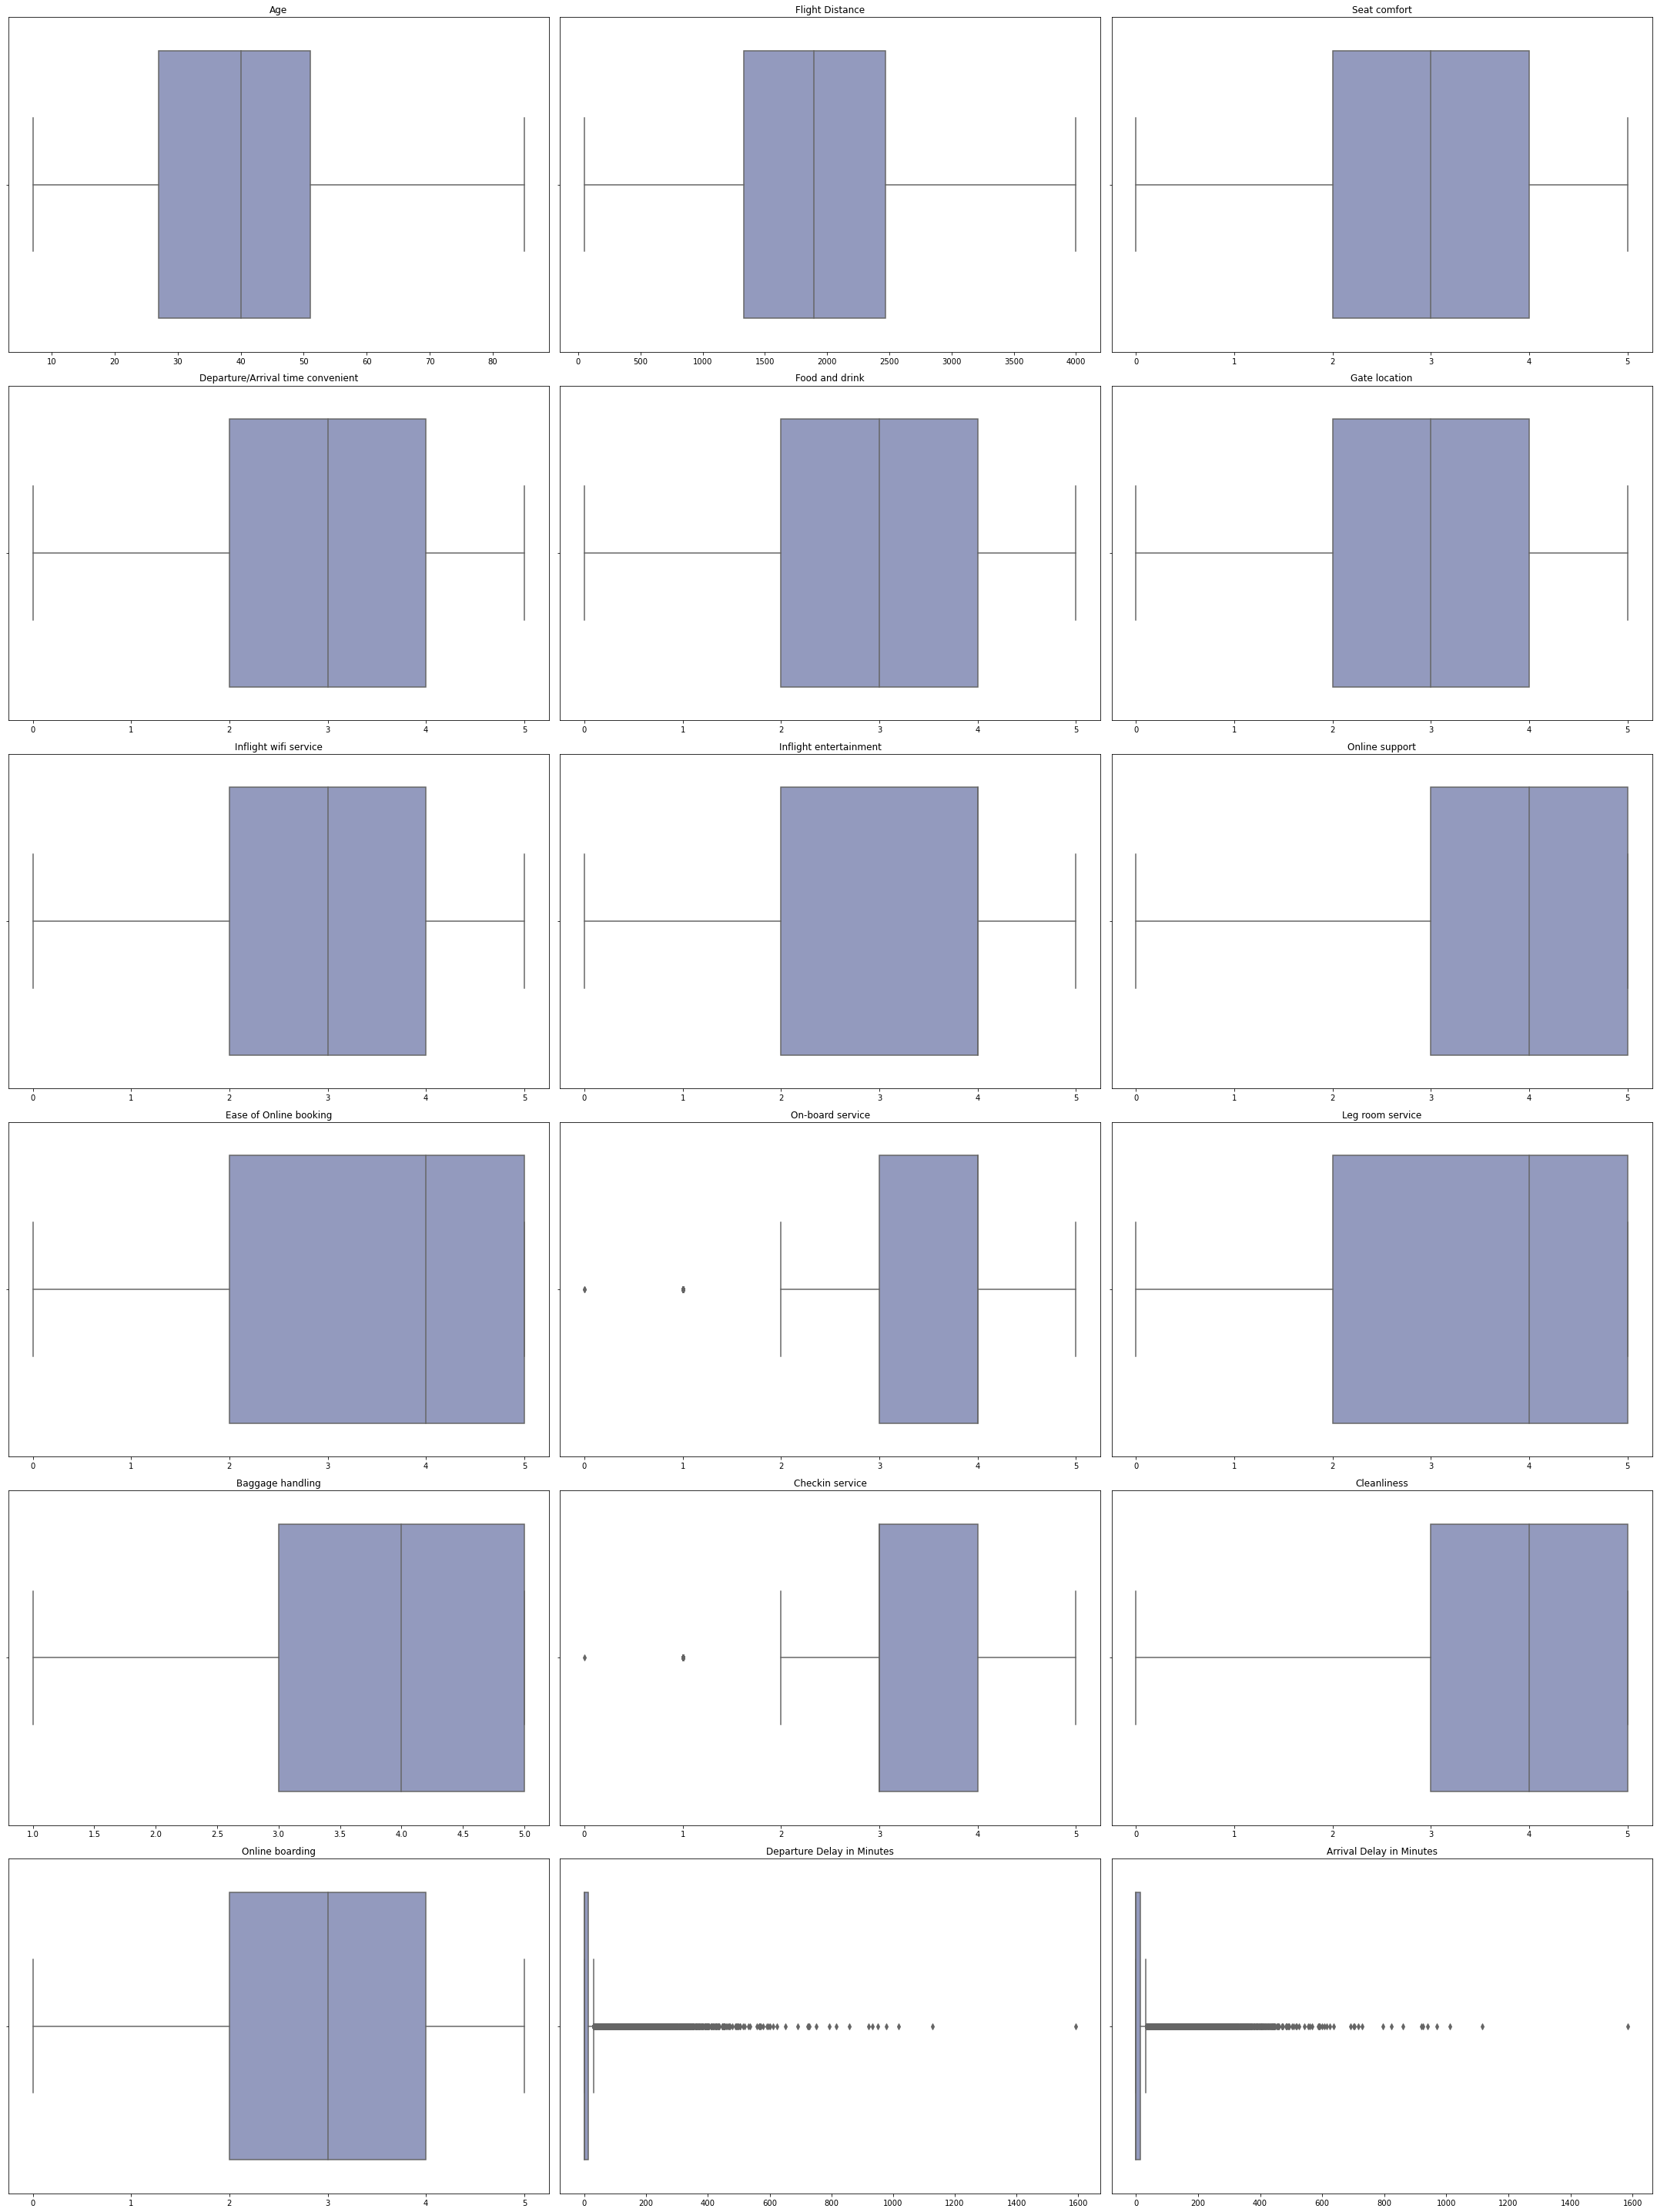

In [27]:
#visualizamos los outliers de df cortos
fig, axes = plt.subplots(6, 3, figsize=(30,40))

axes = axes.flat

for indice, cate in enumerate(df_num):

    sns.boxplot(x = df_cortos[cate], data = df_cortos, ax=axes[indice], palette = "BuPu"); # para trazar una línea de densidad

    axes[indice].set_title(cate)
    axes[indice].set_xlabel("")

fig.tight_layout();

Vemos que no tenemos outliers en Flight Distance pero seguimos teniendo en el resto de columnas que SI habia

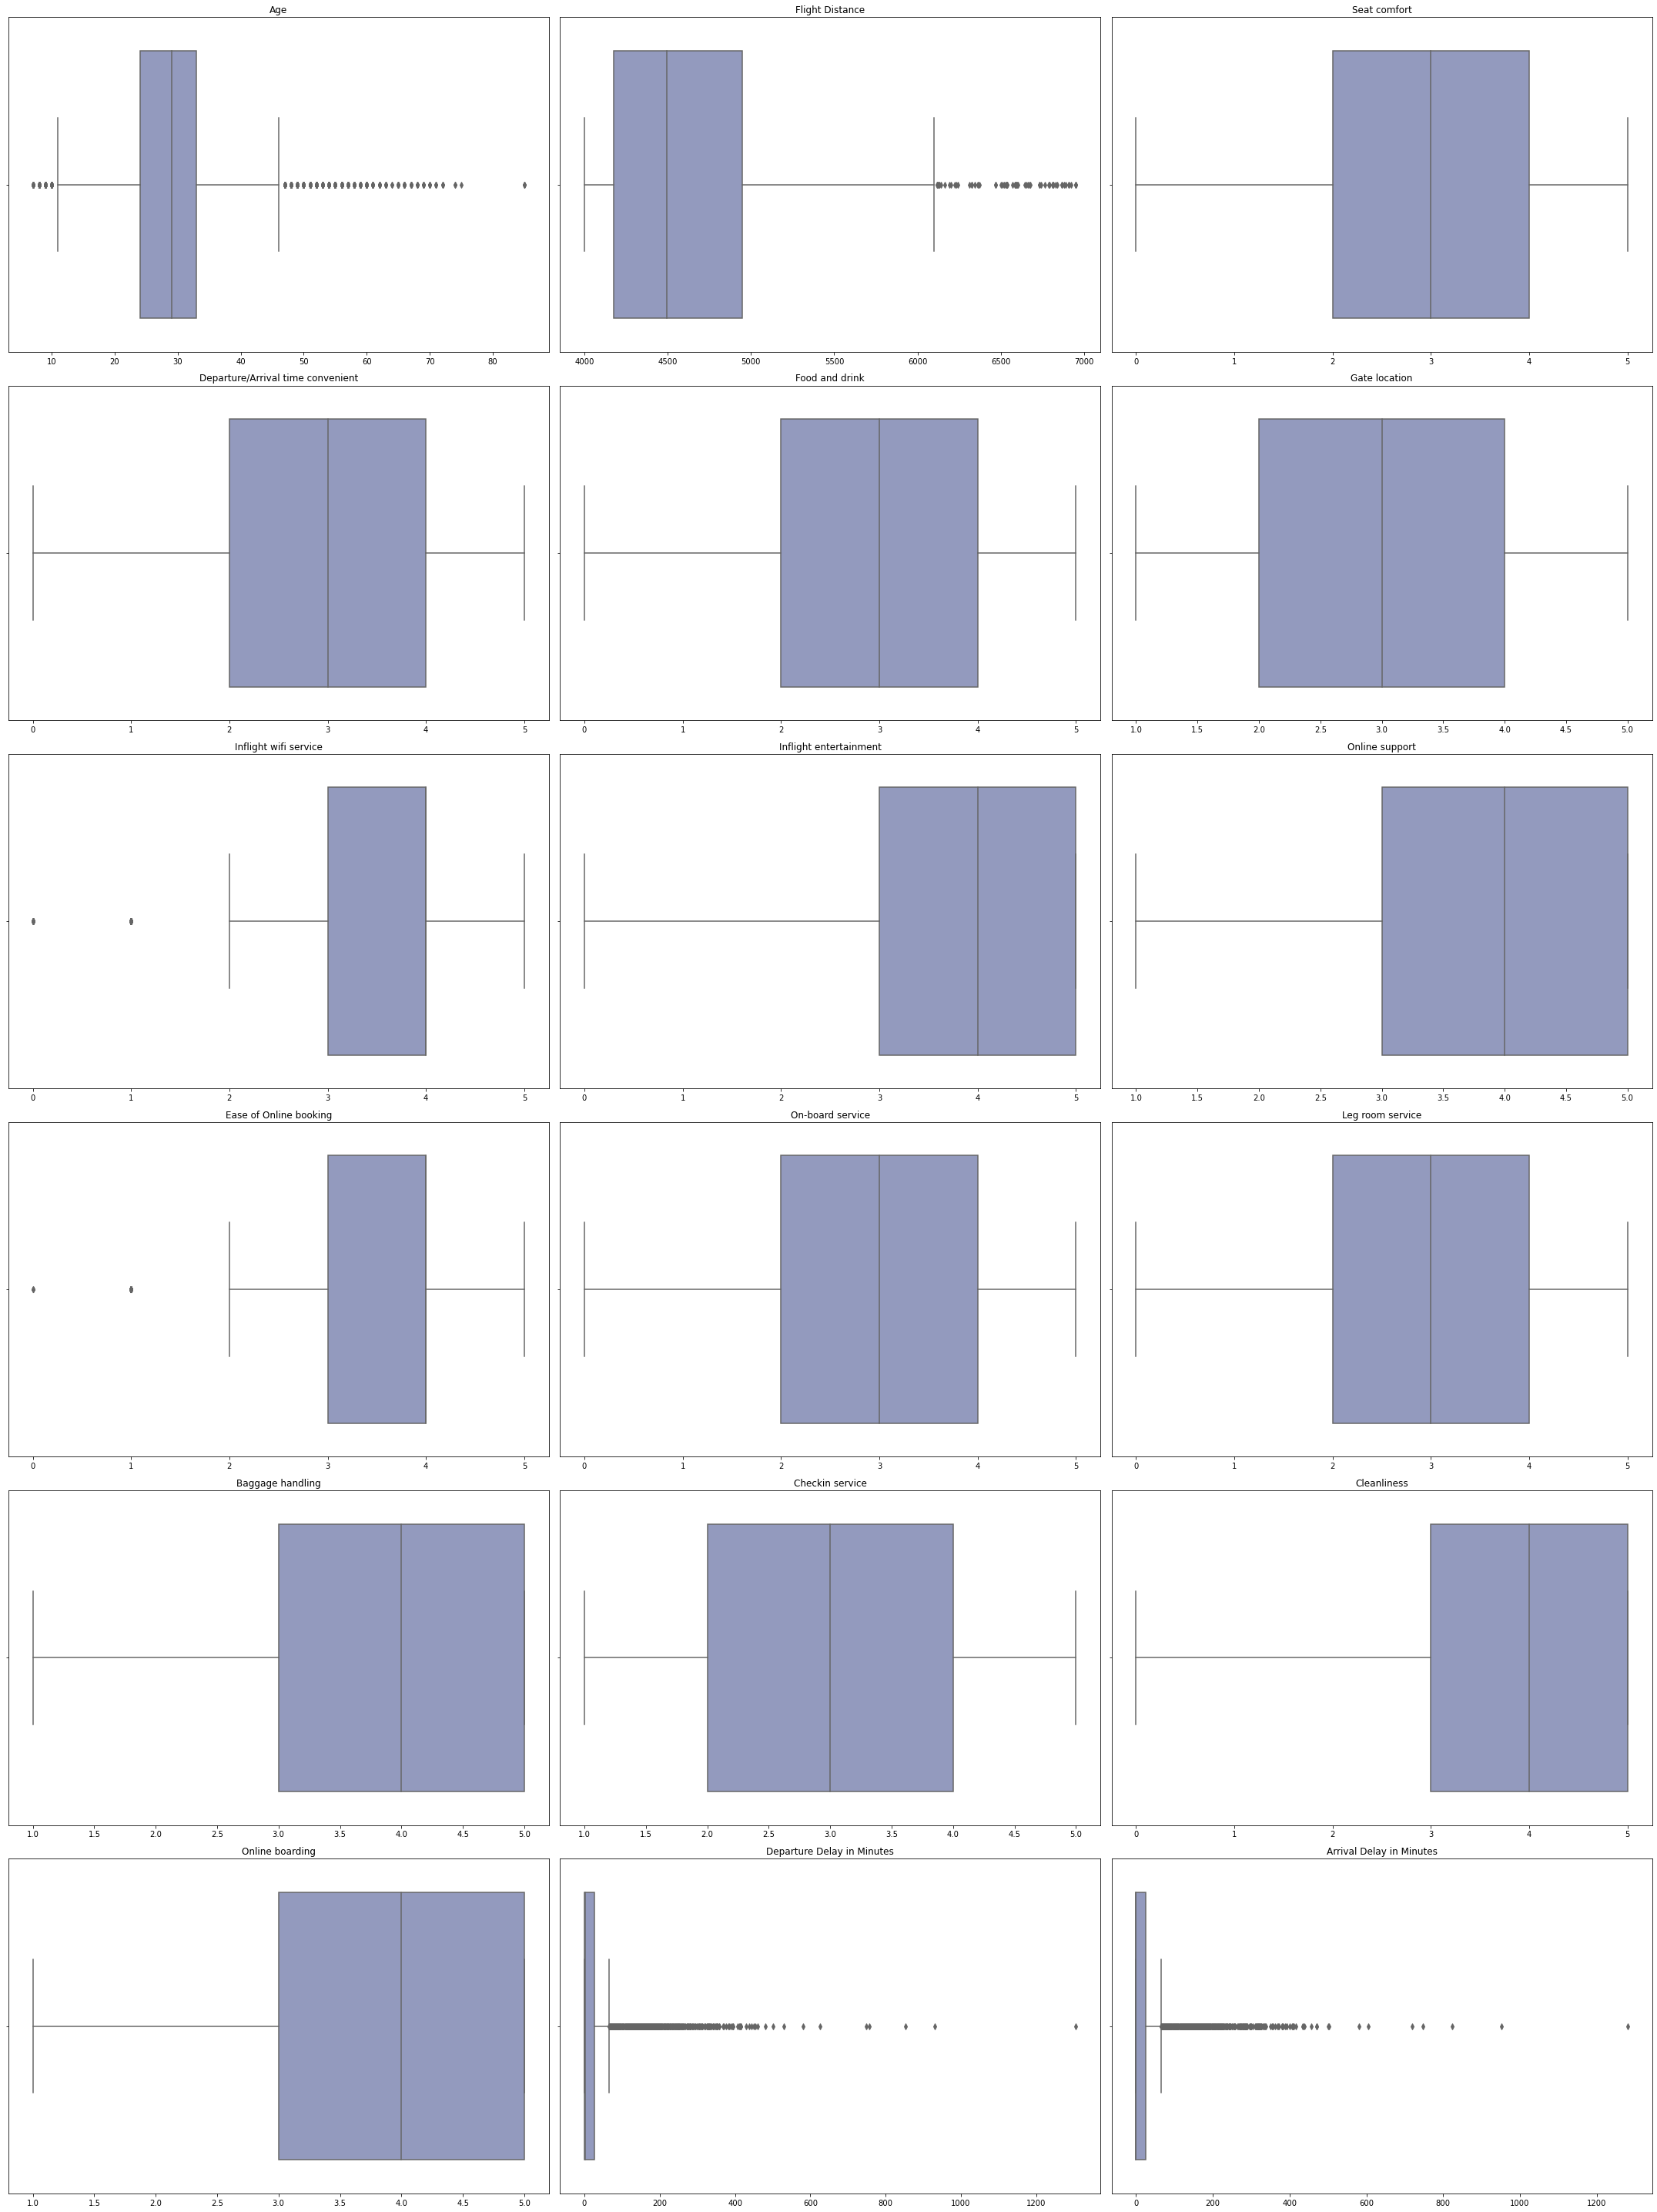

In [28]:
#Visualizamos los outliers en el df de los vuelos lagos

fig, axes = plt.subplots(6, 3, figsize=(30,40))

axes = axes.flat

for indice, cate in enumerate(df_num):

    sns.boxplot(x = df_largos[cate], data = df_largos, ax=axes[indice], palette = "BuPu"); # para trazar una línea de densidad

    axes[indice].set_title(cate)
    axes[indice].set_xlabel("")

fig.tight_layout();

Al hacer la visualizacion de los outliers vemos que nos sirve de poco hacer una separacion en dos DF dependiendo de la distancia de los vuelos, incluso en los vuelos largos los outliers empeoran ya que hay categorias donde no teniamos y ahora si.
Asi que lo que haremos sera categorizar los vuelos dependiendo si son vuelos cortos(0) o largos(1) para no perder informacion 

In [29]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0


Hemos decidido que crearemos una columna nueva llamada Distance usando un .cut categorizando con un 0 los vuelos cortos y un 1 los vuelos largos, que aproximadamente se dividian sobre las 4000 millas por vuelo

In [30]:

df["Distance"] = pd.cut(x= df["Flight Distance"], bins = 2 , labels = [0, 1] )

In [31]:
df2 = df.drop(["Flight Distance"], axis = 1)  #borramos la columna donde nos salian los outliers para poder tener un df mas limpio

In [32]:
df2.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Distance
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0,0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305,0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0,0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0,0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0,0


In [33]:
df2.dtypes   #comprobamos el tipo de dato que tenemos en la nueva columna

satisfaction                           object
Gender                                 object
Customer Type                          object
Age                                     int64
Type of Travel                         object
Class                                  object
Seat comfort                            int64
Departure/Arrival time convenient       int64
Food and drink                          int64
Gate location                           int64
Inflight wifi service                   int64
Inflight entertainment                  int64
Online support                          int64
Ease of Online booking                  int64
On-board service                        int64
Leg room service                        int64
Baggage handling                        int64
Checkin service                         int64
Cleanliness                             int64
Online boarding                         int64
Departure Delay in Minutes              int64
Arrival Delay in Minutes          

In [34]:
df_num2 = df2.select_dtypes(include = np.number)
df_num2.head()

,Age,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,65,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0
1,47,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305
2,15,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0
3,60,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0
4,70,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0


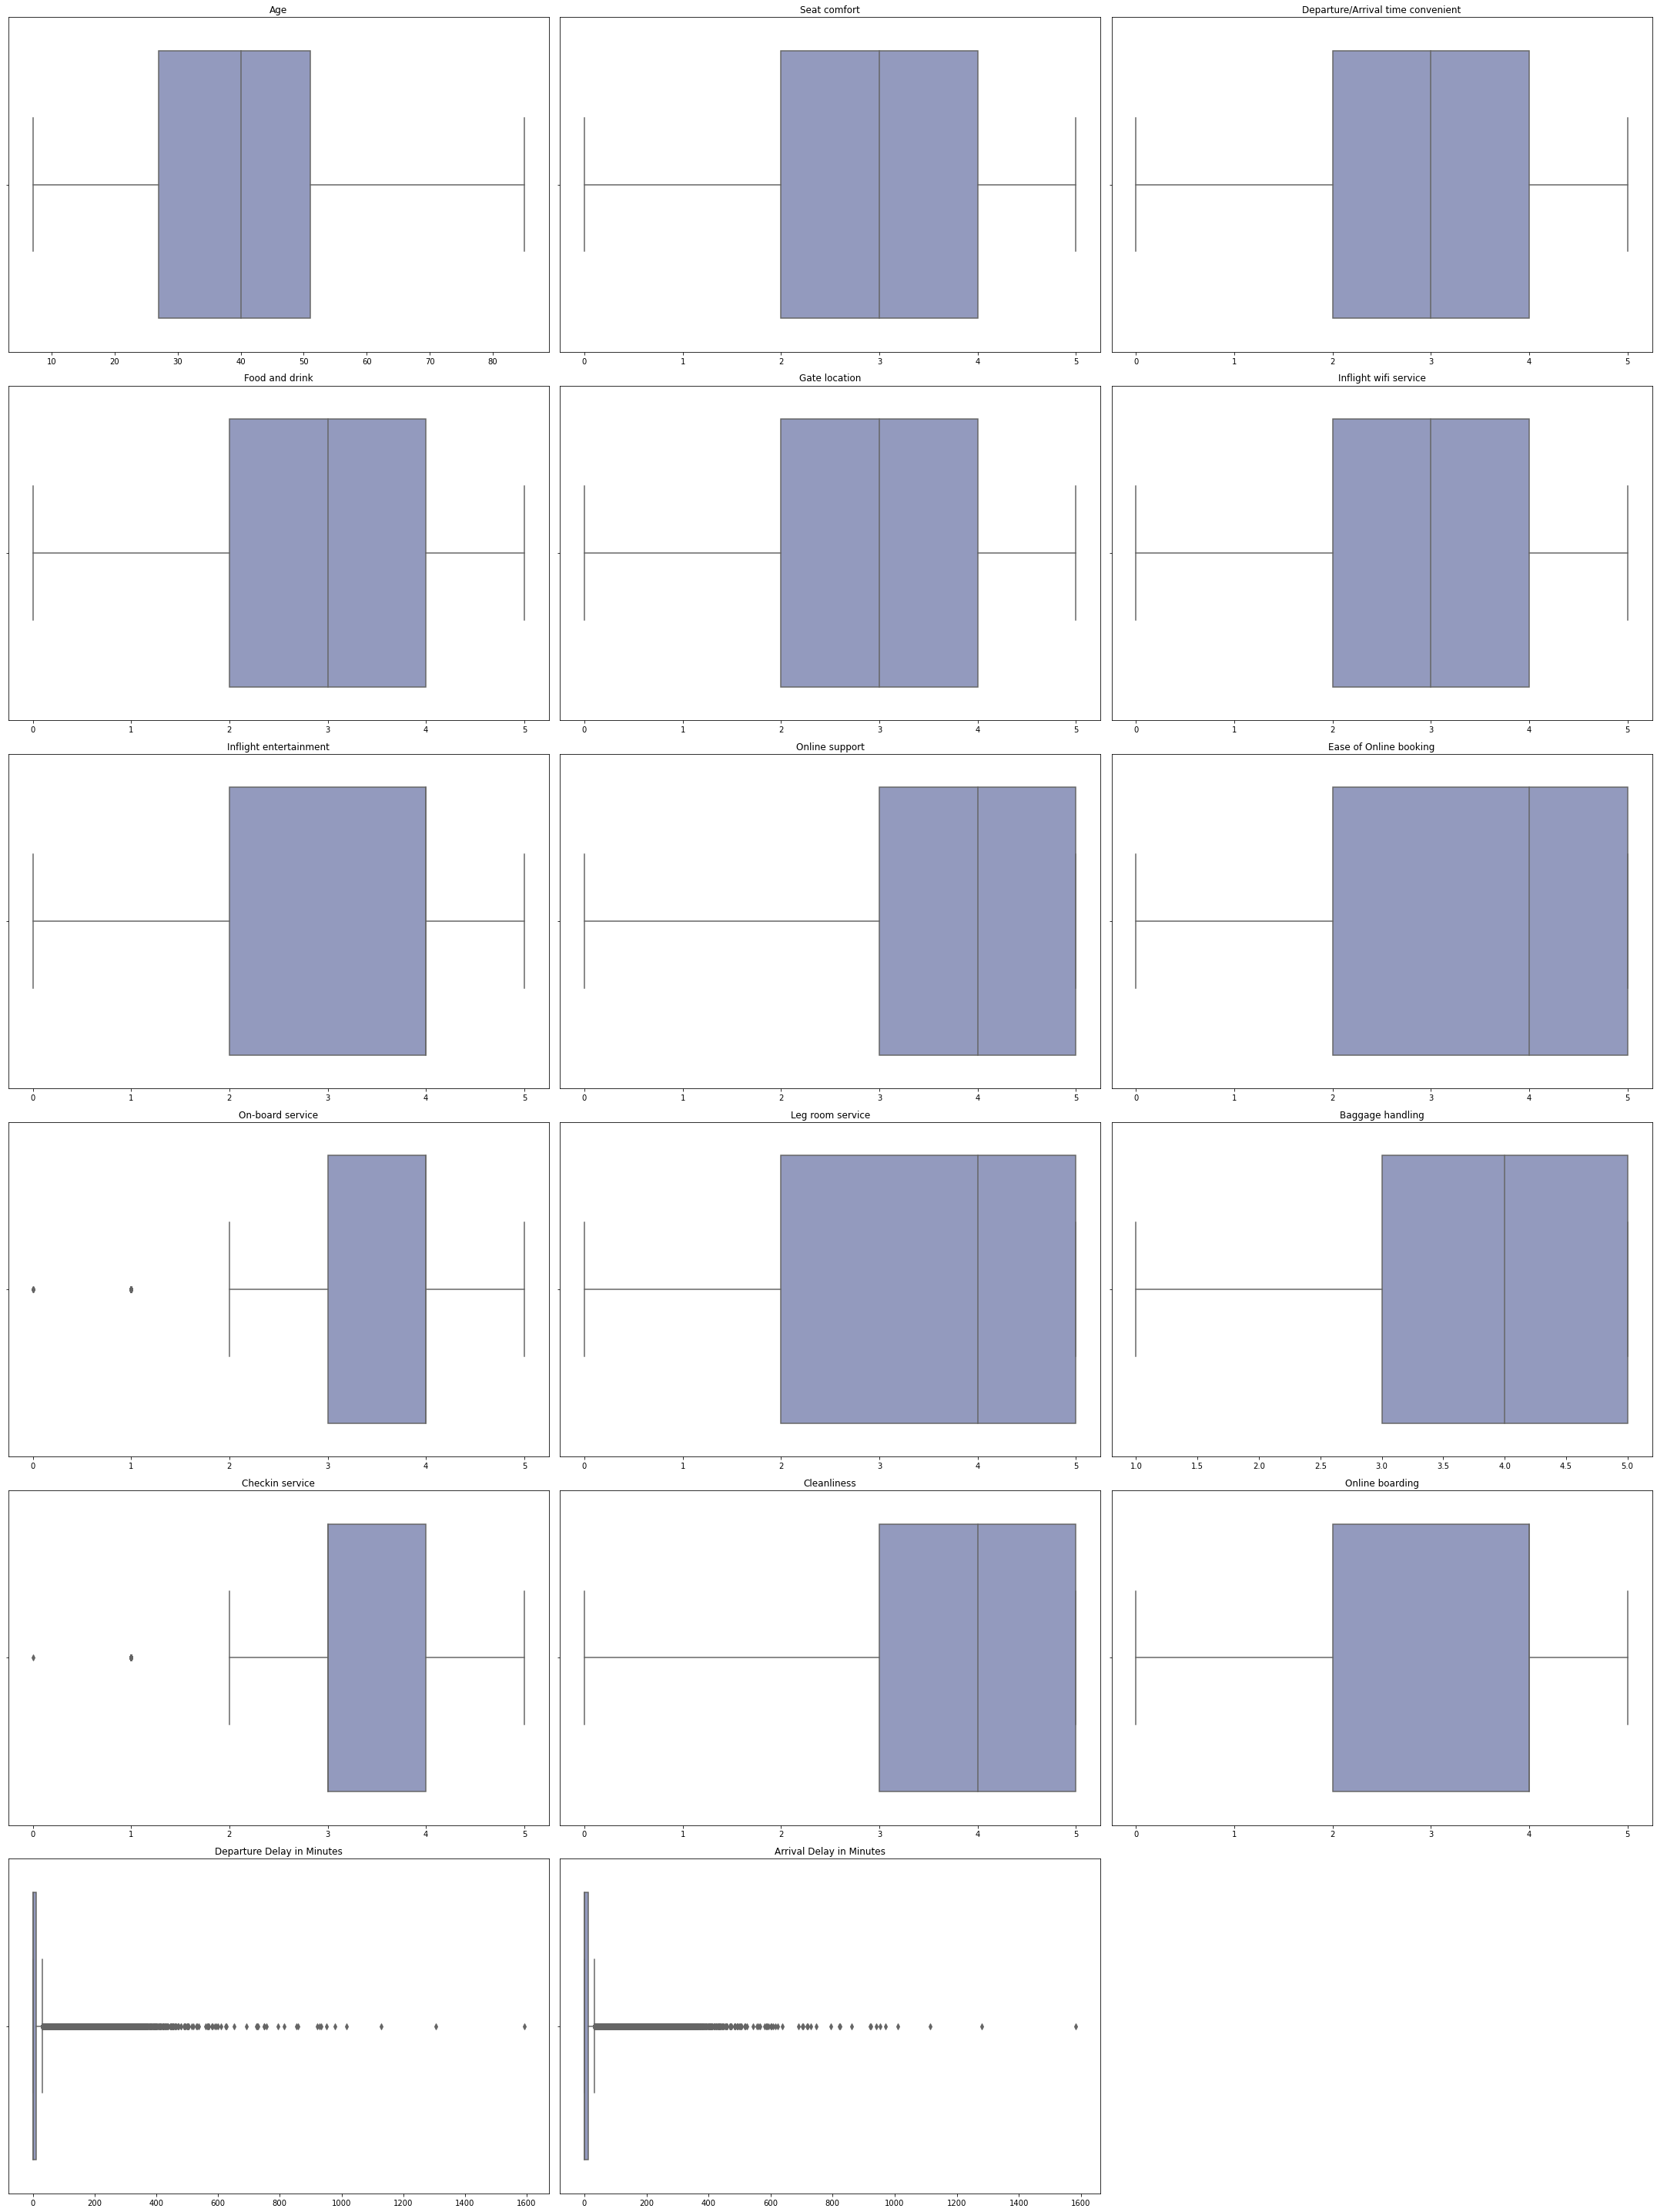

In [35]:
#comprobamos outliers del nuevo df

fig, axes = plt.subplots(6, 3, figsize=(30,40))

axes = axes.flat


for indice, cate in enumerate(df_num2):

    sns.boxplot(x = df2[cate], data = df2, ax=axes[indice], palette = "BuPu"); # para trazar una línea de densidad

    axes[indice].set_title(cate)
    axes[indice].set_xlabel("")

fig.delaxes(axes[-1])
fig.tight_layout();

Se mantienen los outliers que queriamos dejar

Vamos a renombrar las columnas para que esten todas en minusculas y sin espacios y estandarizar un poco los nombres

In [39]:
columnas = {col: col.replace(" ", "_").lower() for col in df.columns}
df2.rename(columns = columnas, inplace=True)
df2.head()

,satisfaction,gender,customer_type,age,type_of_travel,class,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes,distance
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0,0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305,0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0,0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0,0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0,0


In [40]:
df2.to_csv('datos/airline_eda.csv')